In [108]:
from urllib.request import urlretrieve

urlretrieve("https://covid.ourworldindata.org/data/owid-covid-data.csv", "owid-covid-data.csv")
urlretrieve("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv", "vaccinations.csv")

('vaccinations.csv', <http.client.HTTPMessage at 0x2afbe01f490>)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

data = pd.read_csv("owid-covid-data.csv", index_col = "iso_code")
vaxx = pd.read_csv("vaccinations.csv", index_col = "iso_code")

def dates_to_days_since(dates):
    days_since = []
    for date in dates:
        date_time_obj = datetime.strptime(date, "%Y-%m-%d")
        init_date = datetime(2020, 3, 1)
        days_since.append((date_time_obj - init_date).days)
    return days_since

def plot_positive_rate(country_list):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
    for country in country_list:
        country_data = data[data["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
        positives = country_data["positive_rate"]
        
        new_tests = country_data["new_tests_smoothed"]
        new_cases = country_data["new_cases_smoothed"]
        positive_rate = new_cases / new_tests
        
#        plt.plot(days_since, positives, label=country)
        plt.plot(days_since, positive_rate, label=country)
    
    plt.xlim(0.)
    plt.ylim(0.)
#    plt.yscale("log")
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("Positive testing rate")
    plt.legend(loc="best")
    plt.title("Rate of positive testing by country")
    plt.tight_layout()
    return

def plot_new_tests(country_list):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
    for country in country_list:
        country_data = data[data["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
        new_cases = country_data["new_tests_per_thousand"]
        plt.plot(days_since, new_cases, label=country)
    plt.xlim(0.)
    plt.ylim(0.)
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("New tests per thousand")
    plt.legend(loc="best")
    plt.title("New tests per thousand by country")
    plt.tight_layout()
    return

def plot_new_cases(country_list):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
    for country in country_list:
        country_data = data[data["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
        new_cases = country_data["new_cases_smoothed_per_million"]
#        new_cases = country_data["new_cases_per_million"]
        plt.plot(days_since, new_cases, label=country)
        #plt.plot(dates, new_cases, label=country)
#    plt.axvline(x=244., color=("orange"), label="Halloween")
#    plt.axvline(x=270., color=("brown"), linestyle="--", label="Thanksgiving")
#    plt.axvline(x=299, color=("red"), linestyle="--", label="Christmas")
#    plt.axvline(x=306., color=("blue"), linestyle="--", label="New Year's Day")
#    plt.axvline(x=338., color=("green"), label="Super Bowl Sunday")
    plt.xlim(0.)
    plt.ylim(0.)
#    plt.ylim(10.)
#    plt.yscale("log")
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("New cases per million (smoothed)")
    plt.legend(loc="best")
    plt.title("New cases per million by country")
    plt.tight_layout()
    return

def plot_new_deaths(country_list):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
    for country in country_list:
        country_data = data[data["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
        new_deaths = country_data["new_deaths_smoothed_per_million"]
        plt.plot(days_since, new_deaths, label=country)
    plt.xlim(0.)
    plt.ylim(0.)
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("New deaths per million (smoothed)")
    plt.legend(loc="best")
    plt.title("New deaths per million by country")
    plt.tight_layout()
    return

def plot_icu_patients(country_list):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
    for country in country_list:
        country_data = data[data["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
        icu_patients = country_data["icu_patients_per_million"]
        plt.plot(days_since, icu_patients, label=country)
    plt.xlim(0.)
    plt.ylim(0.)
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("ICU patients per million")
    plt.legend(loc="best")
    plt.title("ICU patients per million by country")
    plt.tight_layout()
    return

def plot_vaxx(country_list):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
    for country in country_list:
        country_data = vaxx[vaxx["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
#        vaxxes = country_data["daily_vaccinations_per_million"]
        vaxxes = country_data["people_fully_vaccinated_per_hundred"]
        plt.plot(days_since, vaxxes, label=country)
    plt.xlim(0.)
    plt.ylim(0.)
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("People fully vaccinated per hundred")
    plt.legend(loc="best")
    plt.title("People fully vaccinated per hundred by country")
    plt.tight_layout()
    return

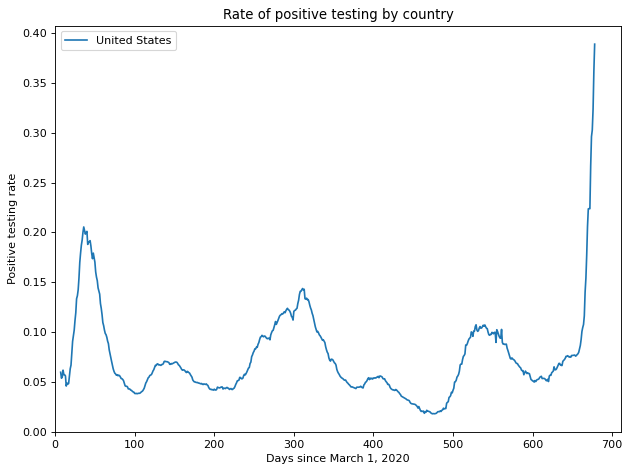

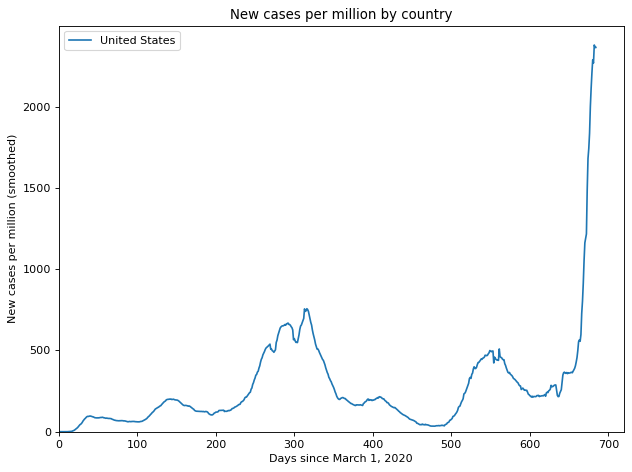

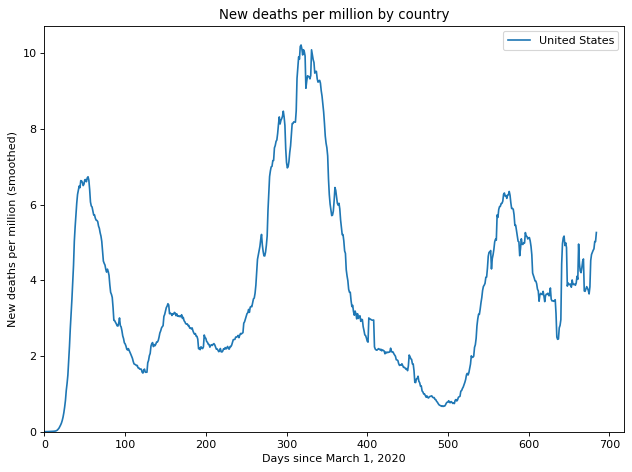

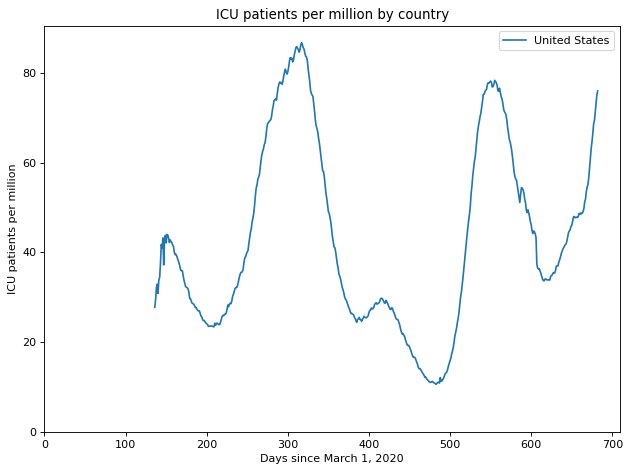

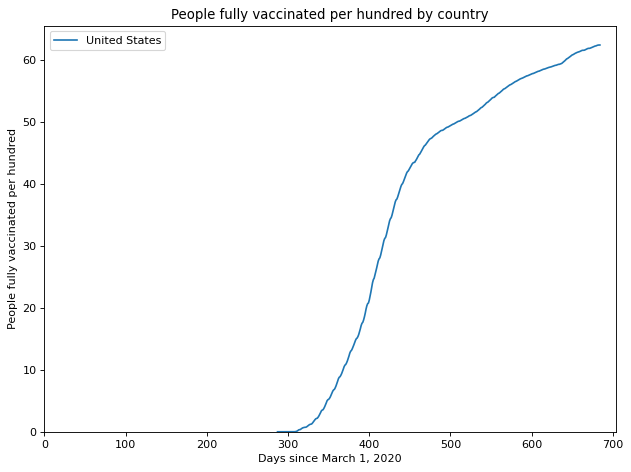

In [110]:
country_list = ["United States"]
plot_positive_rate(country_list)
#plot_new_tests(country_list)
plot_new_cases(country_list)
plot_new_deaths(country_list)
plot_icu_patients(country_list)
plot_vaxx(country_list)